In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [2]:
from qiskit import BasicAer, transpile, QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, IGate, CXGate, QFT
import numpy as np

In [3]:
import qiskit.quantum_info as qi

In [3]:
simulator = AerSimulator()

circuit = QuantumCircuit()

In [ ]:
# Initial state implementation

# 1. Find an eignestate of momentum operator

# 2. Initiate state function

# 3. 

In [ ]:
def Kinetic_potential(qc):
    qc.append(HGate(), [])

In [ ]:
def Vpotential(n, data):
    V_x = np.eye(n)
    

In [4]:
from matplotlib import pyplot as plt

In [59]:
# V potential implementation

I = np.eye(2)
Z = np.array([[1, 0],[ 0, -1]])

In [68]:
n =4
xline = np.linspace(0, 4, int(2**n))
vline = np.sin((2*np.pi/2) *xline)+1

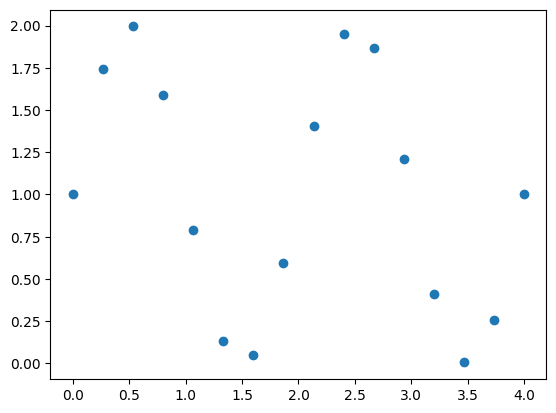

In [69]:
plt.scatter(xline, np.sin((2*np.pi/2) *xline)+1)

In [70]:
print("n:", n, ", 2^n:", 2**n)
V_x = np.matrix(np.diag(vline))
V_x.diagonal()

n: 4 , 2^n: 16


matrix([[1.        , 1.74314483, 1.9945219 , 1.58778525, 0.79208831,
         0.1339746 , 0.04894348, 0.59326336, 1.40673664, 1.95105652,
         1.8660254 , 1.20791169, 0.41221475, 0.0054781 , 0.25685517,
         1.        ]])

In [8]:
import numpy as np
from itertools import combinations, combinations_with_replacement as re_combi, product
from functools import reduce

In [9]:
def krons(oper_list):
    return reduce(np.kron, oper_list)
def get_pauli_z_family_n_qubit(n):
    return list(map(krons, product([I, Z], repeat=int(n)))), list(map(lambda x: "".join(x), product("IZ", repeat=int(n))))

In [73]:
pauli_z, z_symbol = get_pauli_z_family_n_qubit(n)

In [74]:
pauli_coefficient = np.fromiter(map(lambda x: np.trace(V_x.getH() @ np.matrix(x)), pauli_z), dtype=float)
print(z_symbol)
pauli_coefficient

['IIII', 'IIIZ', 'IIZI', 'IIZZ', 'IZII', 'IZIZ', 'IZZI', 'IZZZ', 'ZIII', 'ZIIZ', 'ZIZI', 'ZIZZ', 'ZZII', 'ZZIZ', 'ZZZI', 'ZZZZ']


array([ 1.60000000e+01, -4.45228685e-01, -1.11061251e+00,  8.88178420e-16,
        9.51436445e+00, -2.44249065e-15, -4.21884749e-15, -4.70463011e+00,
       -2.12556562e-01,  7.77156117e-16,  1.77635684e-15,  1.05104235e-01,
       -2.10942375e-15, -9.00404044e-01, -2.24603677e+00, -5.55111512e-16])

In [79]:
from qiskit.quantum_info import SparsePauliOp

In [81]:
V_hamiltonian = SparsePauliOp(z_symbol, pauli_coefficient)
V_hamiltonian

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IIZZ', 'IZII', 'IZIZ', 'IZZI', 'IZZZ', 'ZIII', 'ZIIZ', 'ZIZI', 'ZIZZ', 'ZZII', 'ZZIZ', 'ZZZI', 'ZZZZ'],
              coeffs=[ 1.60000000e+01+0.j, -4.45228685e-01+0.j, -1.11061251e+00+0.j,
  8.88178420e-16+0.j,  9.51436445e+00+0.j, -2.44249065e-15+0.j,
 -4.21884749e-15+0.j, -4.70463011e+00+0.j, -2.12556562e-01+0.j,
  7.77156117e-16+0.j,  1.77635684e-15+0.j,  1.05104235e-01+0.j,
 -2.10942375e-15+0.j, -9.00404044e-01+0.j, -2.24603677e+00+0.j,
 -5.55111512e-16+0.j])

In [ ]:
def V_potential(n, data):
    assert int(2**n)==data.size, f"The data size {data.size} must be same with 2^n: {int(2**n)}."
    V_x = np.matrix(np.diag(data))
    pauli_z, z_symbol = get_pauli_z_family_n_qubit(n)
    # Hilbert-Schmidt inner product of matrices
    pauli_coefficient = np.fromiter(map(lambda x: np.trace(V_x.getH() @ np.matrix(x)), pauli_z), dtype=float) 
    return SparsePauliOp(z_symbol, pauli_coefficient)
def V_potential_from_function(n, x_i, x_f, func):
    xline = np.linspace(x_i, x_f, n, endpoint=True)
    return V_potential(n, func(xline))

In [10]:
i_v = np.array([1,1])
i_z = np.array([1, -1])

In [11]:
def krons(oper_list):
    return reduce(np.kron, oper_list)

In [13]:
n=4
list(map(krons, product([i_v, i_z], repeat=int(n))))

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1]),
 array([ 1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1]),
 array([ 1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1]),
 array([ 1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1]),
 array([ 1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1]),
 array([ 1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1]),
 array([ 1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1]),
 array([ 1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([ 1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1]),
 array([ 1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1]),
 array([ 1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1]),
 array([ 1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1]),
 array([ 1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1

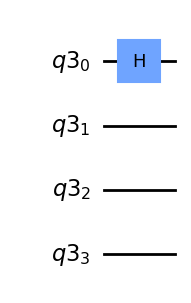

In [76]:
qr = QuantumRegister(n)
qc = QuantumCircuit(qr)
qc.h(0)
qc.draw('mpl')

In [77]:
stv = qi.Statevector.from_instruction(qc)

In [78]:
stv.expectation_value()

'Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,\n             0.        +0.j, 0.        +0.j, 0.        +0.j,\n             0.        +0.j, 0.        +0.j, 0.        +0.j,\n             0.        +0.j, 0.        +0.j, 0.        +0.j,\n             0.        +0.j, 0.        +0.j, 0.        +0.j,\n             0.        +0.j],\n            dims=(2, 2, 2, 2))'

In [6]:
# Potential implementation
from mpmath import exp

## Tunneling Simulation

In [ ]:
# Register setting
num_qubits = 6
k_register= num_qubits-1
# Parameter-time
dt = 0.01
steps = 30
T = dt * steps

# Clock system for measurement
# num_clock = fun_cal(num_qubits, dt, numbers)
num_clock = 0 

total_qubits= num_qubits + num_clock

In [ ]:
q = QuantumRegister(total_qubits, 'q')
c = ClassicalRegister(total_qubits, "c")
qc= QuantumCircuit(q, c)